In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import streamlit as st

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [11]:
# Load data

data = web.DataReader('BAJFINANCE.NS', data_source='yahoo',start='2012-08-01', end='2021-07-31')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-08-01,101.894585,99.295601,100.558662,101.505951,48343.0,97.630554
2012-08-02,102.016029,100.364342,100.558662,101.345642,34428.0,97.476372
2012-08-03,102.987610,100.257469,100.262329,101.938301,41046.0,98.046417
2012-08-06,102.982758,100.077728,102.982758,100.631531,120988.0,96.789528
2012-08-07,103.764877,100.364342,100.378914,103.381104,160768.0,99.434128
...,...,...,...,...,...,...
2021-07-26,6198.299805,6130.000000,6150.000000,6162.450195,733502.0,6140.093262
2021-07-27,6327.000000,6175.000000,6180.000000,6231.450195,2068528.0,6208.843262
2021-07-28,6284.000000,6157.000000,6257.899902,6262.000000,1149153.0,6239.282227


In [12]:
# Shape of the data

data.shape

(2214, 6)

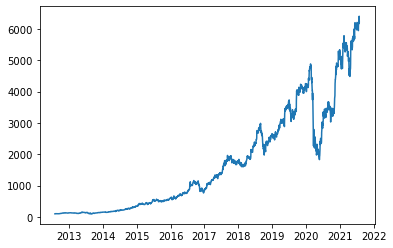

In [13]:
# plot of closing price

plt.plot(data.Close)

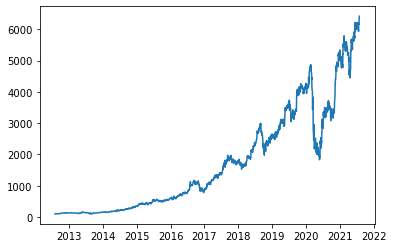

In [14]:
# plot of opening price

plt.plot(data.Open)

In [15]:
# 100 day moving average

ma100 = data.Close.rolling(100).mean()
ma100

Date
2012-08-01            NaN
2012-08-02            NaN
2012-08-03            NaN
2012-08-06            NaN
2012-08-07            NaN
                 ...     
2021-07-26    5578.026963
2021-07-27    5587.692466
2021-07-28    5597.644468
2021-07-29    5608.482471
2021-07-30    5615.334473
Name: Close, Length: 2214, dtype: float64

In [16]:
# 200 day moving average

ma200 = data.Close.rolling(200).mean()
ma200

Date
2012-08-01            NaN
2012-08-02            NaN
2012-08-03            NaN
2012-08-06            NaN
2012-08-07            NaN
                 ...     
2021-07-26    5105.181481
2021-07-27    5118.967231
2021-07-28    5133.621482
2021-07-29    5148.989733
2021-07-30    5163.540734
Name: Close, Length: 2214, dtype: float64

In [17]:
# 50 day moving average

ma50 = data.Close.rolling(50).mean()
ma50

Date
2012-08-01            NaN
2012-08-02            NaN
2012-08-03            NaN
2012-08-06            NaN
2012-08-07            NaN
                 ...     
2021-07-26    5951.349980
2021-07-27    5967.376982
2021-07-28    5978.841982
2021-07-29    5994.219980
2021-07-30    6007.006982
Name: Close, Length: 2214, dtype: float64

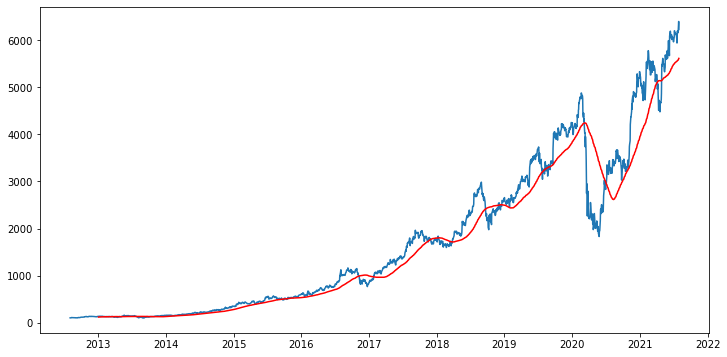

In [18]:
# plot of 100 day moving average

plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

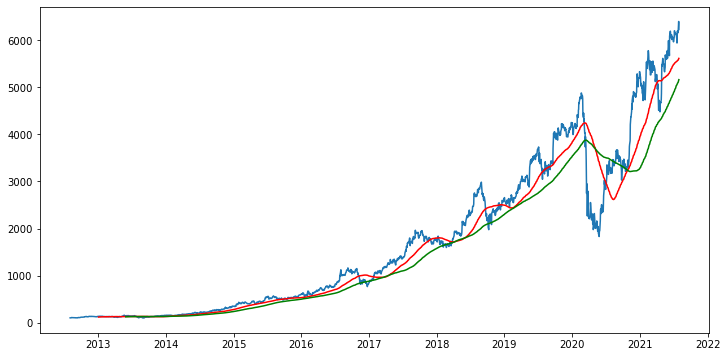

In [19]:
# plot of 100 & 200 day moving average

plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

If 100 days MA is above the 200 days MA then it is in uptrend & if 100 days MA is below the 200 days MA then it is in downtrend

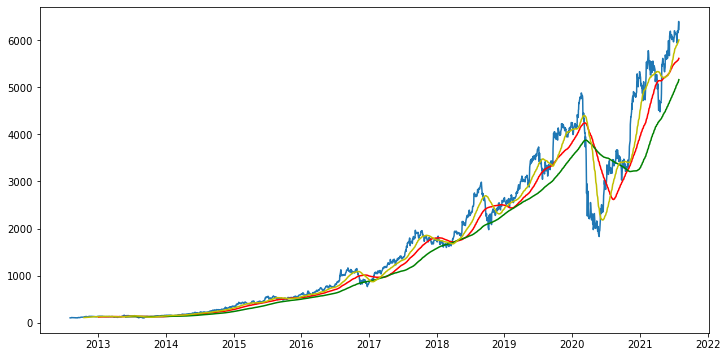

In [20]:
# plot of 50, 100 & 200 day moving average

plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.plot(ma50, 'y')

In [21]:
# prepare data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data

array([[4.88909350e-04],
       [4.63470267e-04],
       [5.57518117e-04],
       ...,
       [9.78085176e-01],
       [1.00000000e+00],
       [9.72705670e-01]])

In [22]:
# Training the data

prediction_days = 60

x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2154, 60, 1)

In [23]:
# build the model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units=50))
model.add(Dropout(0.2))


# prediction of the next closing value
model.add(Dense(units=1))

In [24]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
68/68 [==============================] - 7s 39ms/step - loss: 0.0011
Epoch 2/25
68/68 [==============================] - 3s 40ms/step - loss: 0.0012
Epoch 3/25
68/68 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 4/25
68/68 [==============================] - 3s 40ms/step - loss: 0.0010
Epoch 5/25
68/68 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 6/25
68/68 [==============================] - 3s 40ms/step - loss: 8.8129e-04
Epoch 7/25
68/68 [==============================] - 3s 40ms/step - loss: 9.4855e-04
Epoch 8/25
68/68 [==============================] - 3s 40ms/step - loss: 9.9779e-04
Epoch 9/25
68/68 [==============================] - 3s 40ms/step - loss: 9.8130e-04
Epoch 10/25
68/68 [==============================] - 3s 42ms/step - loss: 9.8878e-04
Epoch 11/25
68/68 [==============================] - 3s 41ms/step - loss: 9.6679e-04
Epoch 12/25
68/68 [==============================] - 3s 40ms/step - loss: 9.0233e-04
Epoch 13/

In [27]:
# saving the model

model.save('keras_model.h5')

In [28]:
# load test data

test_start = '2021-07-31'
test_end = '2022-08-10'

test_data = web.DataReader('BAJFINANCE.NS', data_source='yahoo',start=test_start, end=test_end)
actual_prices = test_data['Close'].values
actual_prices

array([6200.5       , 6331.89990234, 6359.14990234, 6248.25      ,
       6224.29980469, 6193.14990234, 6170.10009766, 6167.79980469,
       6199.5       , 6156.54980469, 6377.14990234, 6410.10009766,
       6544.10009766, 6661.10009766, 6752.20019531, 6980.10009766,
       6944.95019531, 6931.95019531, 6966.60009766, 7165.5       ,
       7524.5       , 7519.60009766, 7498.45019531, 7523.39990234,
       7506.35009766, 7457.29980469, 7463.20019531, 7430.64990234,
       7445.54980469, 7417.54980469, 7414.14990234, 7411.5       ,
       7428.79980469, 7442.45019531, 7813.85009766, 7793.64990234,
       7899.04980469, 7793.39990234, 7795.45019531, 7543.29980469,
       7515.39990234, 7668.10009766, 7522.75      , 7695.04980469,
       7724.20019531, 7735.14990234, 7747.89990234, 7732.20019531,
       7817.10009766, 7855.75      , 7929.29980469, 7862.89990234,
       7865.54980469, 7739.29980469, 7761.35009766, 7737.29980469,
       7710.20019531, 7646.64990234, 7855.64990234, 7482.14990

In [29]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [30]:
# make prediction on test data

x_test = []

for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 1s 14ms/step


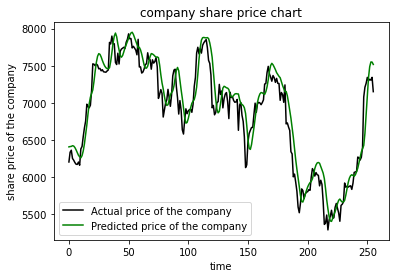

In [31]:
# plot the test predictions

plt.plot(actual_prices, color='black',label='Actual price of the company')
plt.plot(predicted_prices, color='green',label='Predicted price of the company')
plt.title('company share price chart')
plt.xlabel('time')
plt.ylabel('share price of the company')
plt.legend()
plt.show()

In [32]:
# predict next day price

real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[7439.202]]
